In [6]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# Import and Tidy:

Initial Import:

In [7]:
movies <- read_csv("supporting_files/movie_metadata.csv")
head(movies)

Parsed with column specification:
cols(
  .default = col_integer(),
  color = col_character(),
  director_name = col_character(),
  actor_2_name = col_character(),
  genres = col_character(),
  actor_1_name = col_character(),
  movie_title = col_character(),
  actor_3_name = col_character(),
  plot_keywords = col_character(),
  movie_imdb_link = col_character(),
  language = col_character(),
  country = col_character(),
  content_rating = col_character(),
  imdb_score = col_double(),
  aspect_ratio = col_double()
)
See spec(...) for full column specifications.
Warning message:
“4 parsing failures.
 row    col   expected      actual                                  file
2324 budget an integer 2400000000  'supporting_files/movie_metadata.csv'
2989 budget an integer 12215500000 'supporting_files/movie_metadata.csv'
3006 budget an integer 2500000000  'supporting_files/movie_metadata.csv'
3860 budget an integer 4200000000  'supporting_files/movie_metadata.csv'
”

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


Transpose to make easier to understand:

In [8]:
glimpse(movies)

Observations: 5,043
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color", NA, "...
$ director_name             <chr> "James Cameron", "Gore Verbinski", "Sam M...
$ num_critic_for_reviews    <int> 723, 302, 602, 813, NA, 462, 392, 324, 63...
$ duration                  <int> 178, 169, 148, 164, NA, 132, 156, 100, 14...
$ director_facebook_likes   <int> 0, 563, 0, 22000, 131, 475, 0, 15, 0, 282...
$ actor_3_facebook_likes    <int> 855, 1000, 161, 23000, NA, 530, 4000, 284...
$ actor_2_name              <chr> "Joel David Moore", "Orlando Bloom", "Ror...
$ actor_1_facebook_likes    <int> 1000, 40000, 11000, 27000, 131, 640, 2400...
$ gross                     <int> 760505847, 309404152, 200074175, 44813064...
$ genres                    <chr> "Action|Adventure|Fantasy|Sci-Fi", "Actio...
$ actor_1_name              <chr> "CCH Pounder", "Johnny Depp", "Christoph ...
$ movie_title               <chr> "Avatar ", "Pirates of the Caribbean: At ...
$ num_voted_users 

Examine parsing errors:

In [9]:
parse_errs <- problems(movies)
parse_errs

row,col,expected,actual,file
2324,budget,an integer,2400000000,'supporting_files/movie_metadata.csv'
2989,budget,an integer,12215500000,'supporting_files/movie_metadata.csv'
3006,budget,an integer,2500000000,'supporting_files/movie_metadata.csv'
3860,budget,an integer,4200000000,'supporting_files/movie_metadata.csv'


Why such high budgets? Pull out each row and transpose to see details:

In [10]:
prob_values <- movies[parse_errs$row,]
glimpse(prob_values)

Observations: 4
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color"
$ director_name             <chr> "Hayao Miyazaki", "Joon-ho Bong", "Lajos ...
$ num_critic_for_reviews    <int> 174, 363, 73, 202
$ duration                  <int> 134, 110, 134, 112
$ director_facebook_likes   <int> 6000, 584, 45, 0
$ actor_3_facebook_likes    <int> 745, 74, 0, 38
$ actor_2_name              <chr> "Jada Pinkett Smith", "Kang-ho Song", "Pé...
$ actor_1_facebook_likes    <int> 893, 629, 9, 717
$ gross                     <int> 2298191, 2201412, 195888, 211667
$ genres                    <chr> "Adventure|Animation|Fantasy", "Comedy|Dr...
$ actor_1_name              <chr> "Minnie Driver", "Doona Bae", "Marcell Na...
$ movie_title               <chr> "Princess Mononoke ", "The Host ", "Fatel...
$ num_voted_users           <int> 221552, 68883, 5603, 53508
$ cast_total_facebook_likes <int> 2710, 1173, 11, 907
$ actor_3_name              <chr> "Billy Crudup", "Ah-sung Ko", "Bál

All international films - I'm betting they're showing the `budget` column all in a foreign currency. Note, Tibble framework sets all parsing errors to `NA`, so I'll disregard for now and let them be `NA`.

Finally, look at summary of data frame to understand even better:

In [11]:
summary(movies)

    color           director_name      num_critic_for_reviews    duration    
 Length:5043        Length:5043        Min.   :  1.0          Min.   :  7.0  
 Class :character   Class :character   1st Qu.: 50.0          1st Qu.: 93.0  
 Mode  :character   Mode  :character   Median :110.0          Median :103.0  
                                       Mean   :140.2          Mean   :107.2  
                                       3rd Qu.:195.0          3rd Qu.:118.0  
                                       Max.   :813.0          Max.   :511.0  
                                       NA's   :50             NA's   :15     
 director_facebook_likes actor_3_facebook_likes actor_2_name      
 Min.   :    0.0         Min.   :    0.0        Length:5043       
 1st Qu.:    7.0         1st Qu.:  133.0        Class :character  
 Median :   49.0         Median :  371.5        Mode  :character  
 Mean   :  686.5         Mean   :  645.0                          
 3rd Qu.:  194.5         3rd Qu.:  636.0 

Things to keep an eye on from looking at summary again:

* multiple variables have `NA` instead of a value. Ones to be aware of:
  * `duration`: strange that a movie's duration is unknown. Thankfully only 15 instances.
  * `budget`: also strange if no value here, but for the 4 instances of foreign film I found, makes sense. Many more here, at 496.
  * `title_year`: each film definitely has a year it was finished, so strange that 108 instances
  * `aspect_ratio`: 329 instances. But note not really interesting variable given aspect ratio is often modified for some films (3:4 to 16:9)
  * some values may be very excessive - like in `budget`, which has a max of approximatel 2,128,000,000. I'm sure never been movie made for over two billion dollars

Is the data "tidy"?:

* each variable has its own column? Of the 28 variables shown, each represents a unique type of measurement. Check.
* each observation has its own row? Yes, no values exist that branch out into their own measurements. Check.
* each value has its own cell? No, but will treat `plot_keywords` and `generes` as-is. Notes:
  * `genres` is up to five genre keywords in alphabetical order and strings restricted to a representative keyword (ex. there is SciFi but no Scifi). Can leverage this by treating each unique combination as a measurement.
  * `plot_keywords` has a small number of keywords, but nearly infinite number of combinations of any word or short phrase from human language. So leaving this as-is (but possibly using n-grams or something else)
 
Finally, are there any duplicate observations?

In [12]:
dupes <- which(duplicated(movies))
dupes
head(movies[dupes,])

[1]  138  188  205  304  390  396  591  657  795 1221 1306 1450 2170 2293 2473
[16] 2494 2534 2563 2569 2620 2772 2778 2799 2972 3118 3346 3453 3481 3730 3901
[31] 3916 4183 4227 4283 4314 4409 4566 4574 4632 4770 4883 4928 4943 4951 4952

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,David Yates,248,110,282,103,Alexander Skarsgård,11000,124051759,Action|Adventure|Drama|Romance,⋯,239,English,USA,PG-13,180000000,2016,10000,6.6,2.35,29000
Color,Bill Condon,322,115,386,12000,Kristen Stewart,21000,292298923,Adventure|Drama|Fantasy|Romance,⋯,329,English,USA,PG-13,120000000,2012,17000,5.5,2.35,65000
Color,Hideaki Anno,1,120,28,12,Shin'ya Tsukamoto,544,NA,Action|Adventure|Drama|Horror|Sci-Fi,⋯,13,Japanese,Japan,NA,NA,2016,106,8.2,2.35,0
Color,Joe Wright,256,111,456,394,Cara Delevingne,20000,34964818,Adventure|Family|Fantasy,⋯,186,English,USA,PG,150000000,2015,548,5.8,2.35,24000
Color,Josh Trank,369,100,128,78,Reg E. Cathey,596,56114221,Action|Adventure|Sci-Fi,⋯,695,English,USA,PG-13,120000000,2015,360,4.3,2.35,41000
Color,Rob Cohen,187,106,357,4000,Vin Diesel,23000,144512310,Action|Crime|Thriller,⋯,988,English,USA,PG-13,38000000,2001,14000,6.7,2.35,14000


Yes, so create new data frame that removes all duplicate observations:

In [13]:
movies <- movies[which(!duplicated(movies)),]
head(movies)

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,NA,12,7.1,NA,0
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,738,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000


In [14]:
summary(movies)

    color           director_name      num_critic_for_reviews    duration    
 Length:4998        Length:4998        Min.   :  1.0          Min.   :  7.0  
 Class :character   Class :character   1st Qu.: 50.0          1st Qu.: 93.0  
 Mode  :character   Mode  :character   Median :110.0          Median :103.0  
                                       Mean   :139.9          Mean   :107.2  
                                       3rd Qu.:195.0          3rd Qu.:118.0  
                                       Max.   :813.0          Max.   :511.0  
                                       NA's   :49             NA's   :15     
 director_facebook_likes actor_3_facebook_likes actor_2_name      
 Min.   :    0.0         Min.   :    0.0        Length:4998       
 1st Qu.:    7.0         1st Qu.:  133.0        Class :character  
 Median :   49.0         Median :  369.0        Mode  :character  
 Mean   :  688.7         Mean   :  639.9                          
 3rd Qu.:  192.0         3rd Qu.:  635.0 

Left with 4,998 rows. So in summary, checked for parsing errors, reviewed data frame for NA and extreme values, checked if tidy, removed duplicates. Good to go!

### Review/document data and its structure
So what do I have here? No documentation on Kaggle. Looked at spreadsheet and compared against web page for a given movie. My best guesses for variables and what they mean (only ones that are not obvious):

Look at all variables:

In [15]:
colnames(movies)

[1] "color"                     "director_name"            
 [3] "num_critic_for_reviews"    "duration"                 
 [5] "director_facebook_likes"   "actor_3_facebook_likes"   
 [7] "actor_2_name"              "actor_1_facebook_likes"   
 [9] "gross"                     "genres"                   
[11] "actor_1_name"              "movie_title"              
[13] "num_voted_users"           "cast_total_facebook_likes"
[15] "actor_3_name"              "facenumber_in_poster"     
[17] "plot_keywords"             "movie_imdb_link"          
[19] "num_user_for_reviews"      "language"                 
[21] "country"                   "content_rating"           
[23] "budget"                    "title_year"               
[25] "actor_2_facebook_likes"    "imdb_score"               
[27] "aspect_ratio"              "movie_facebook_likes"

* `num_critic_for_reviews`: number of IMDB movie-critic-generated star/text reviews
* `num_voted_users`: number of IMDB user-generated star-only reviews on a scale of 1-10
* `num_user_for_reviews`: number of IMDB regular-user-generated star/text reviews

Ok, data is now tidy and documented well-enough. Moving on to EDA.

# EDA (Visualize <-> Transform <-> Model)
Review data set again:

In [16]:
glimpse(movies)

Observations: 4,998
Variables: 28
$ color                     <chr> "Color", "Color", "Color", "Color", NA, "...
$ director_name             <chr> "James Cameron", "Gore Verbinski", "Sam M...
$ num_critic_for_reviews    <int> 723, 302, 602, 813, NA, 462, 392, 324, 63...
$ duration                  <int> 178, 169, 148, 164, NA, 132, 156, 100, 14...
$ director_facebook_likes   <int> 0, 563, 0, 22000, 131, 475, 0, 15, 0, 282...
$ actor_3_facebook_likes    <int> 855, 1000, 161, 23000, NA, 530, 4000, 284...
$ actor_2_name              <chr> "Joel David Moore", "Orlando Bloom", "Ror...
$ actor_1_facebook_likes    <int> 1000, 40000, 11000, 27000, 131, 640, 2400...
$ gross                     <int> 760505847, 309404152, 200074175, 44813064...
$ genres                    <chr> "Action|Adventure|Fantasy|Sci-Fi", "Actio...
$ actor_1_name              <chr> "CCH Pounder", "Johnny Depp", "Christoph ...
$ movie_title               <chr> "Avatar ", "Pirates of the Caribbean: At ...
$ num_voted_users 

Now a very quick and dirty plot:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2043 rows containing non-finite values (stat_bin).”

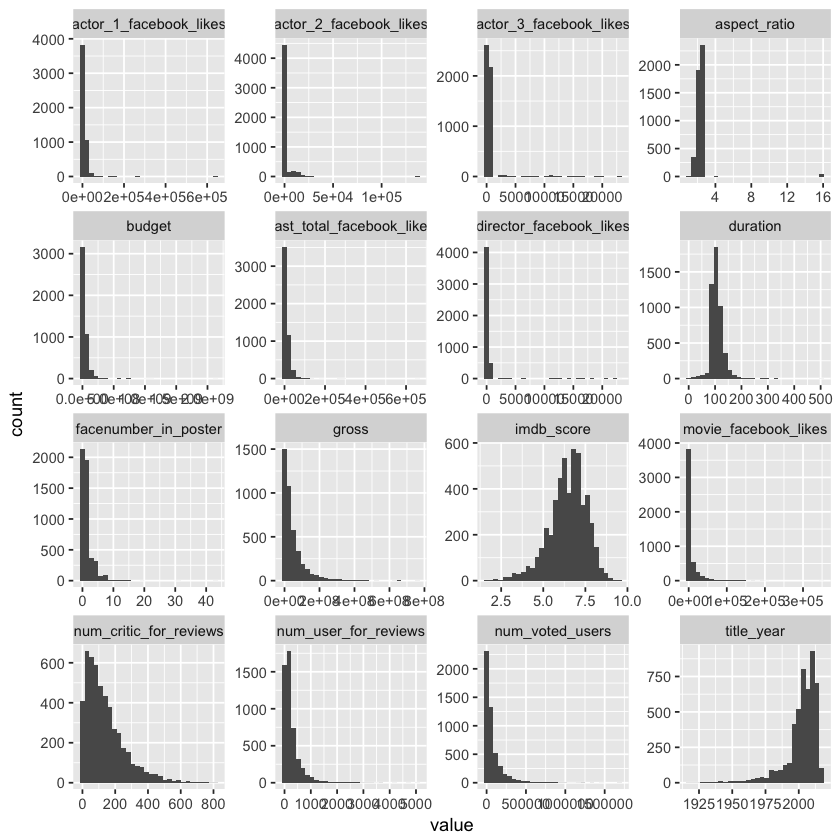

In [17]:
library(purrr)

movies %>%
    keep(is.numeric) %>%
    gather() %>%
    ggplot(aes(x = value)) +
        facet_wrap(~ key, scales = "free") +
        geom_histogram()

Some of these plots are highly skewed and make it difficult to see well (the top row for example). I would like to transform a few of them to log scale:

* actor_1_facebook_likes
* actor_2_facebook_likes
* actor_3_facebook_likes
* budget
* cast_total_facebook_likes
* director_facebook_likes
* gross
* movie_facebook_likes
* num_user_for_reviews
* num_voted_users

In [18]:
rand_sample <- tibble(likes = sample(movies$movie_facebook_likes, 100)) 
head(rand_sample)

likes
13000
16
0
3000
0
10000


In [19]:
sort(rand_sample$likes)

[1]     0     0     0     0     0     0     0     0     0     0     0     0
 [13]     0     0     0     0     0     0     0     0     0     0     0     0
 [25]     0     0     0     0     0     0     0     0     0     0     0     0
 [37]     0     0     0     0     0     0     0     0     0     0     0    16
 [49]    19    33    41    65    89   124   153   166   168   174   249   345
 [61]   355   374   393   418   491   504   531   584   612   672   681   770
 [73]   774   937   963  1000  1000  1000  1000  3000  3000 10000 10000 11000
 [85] 11000 11000 12000 13000 14000 14000 15000 19000 25000 26000 32000 40000
 [97] 40000 43000 43000 43000

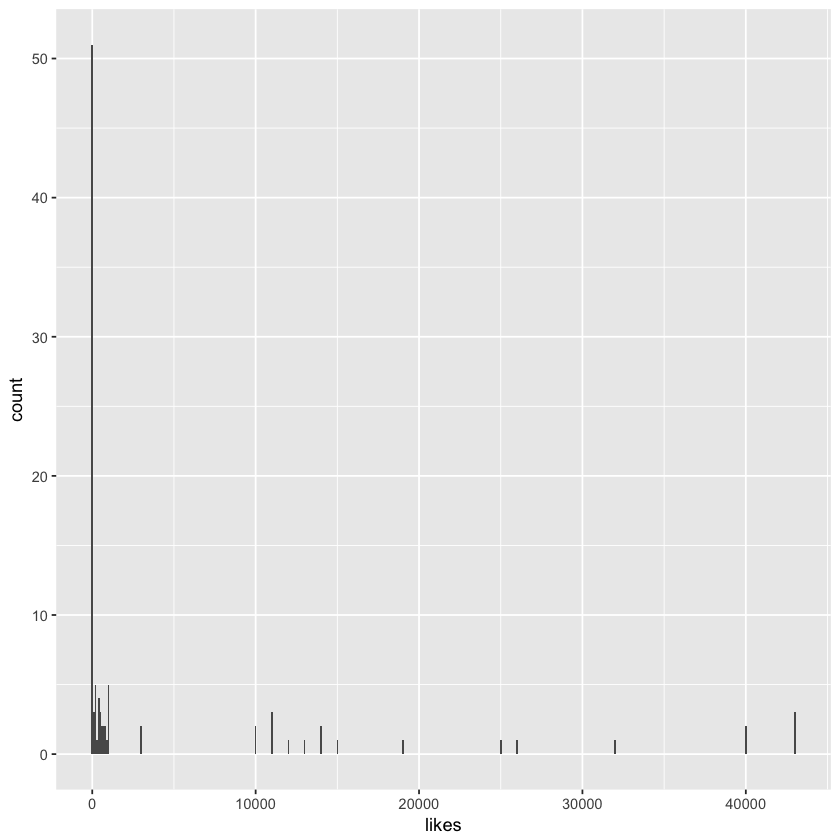

In [20]:
ggplot(rand_sample, aes(x = likes)) +
    geom_histogram(binwidth = 100)

In [21]:
rand_sample_log <- rand_sample %>%
    mutate(likes_log = log10(likes + 1))
head(rand_sample_log)

likes,likes_log
13000,4.113977
16,1.230449
0,0.000000
3000,3.477266
0,0.000000
10000,4.000043


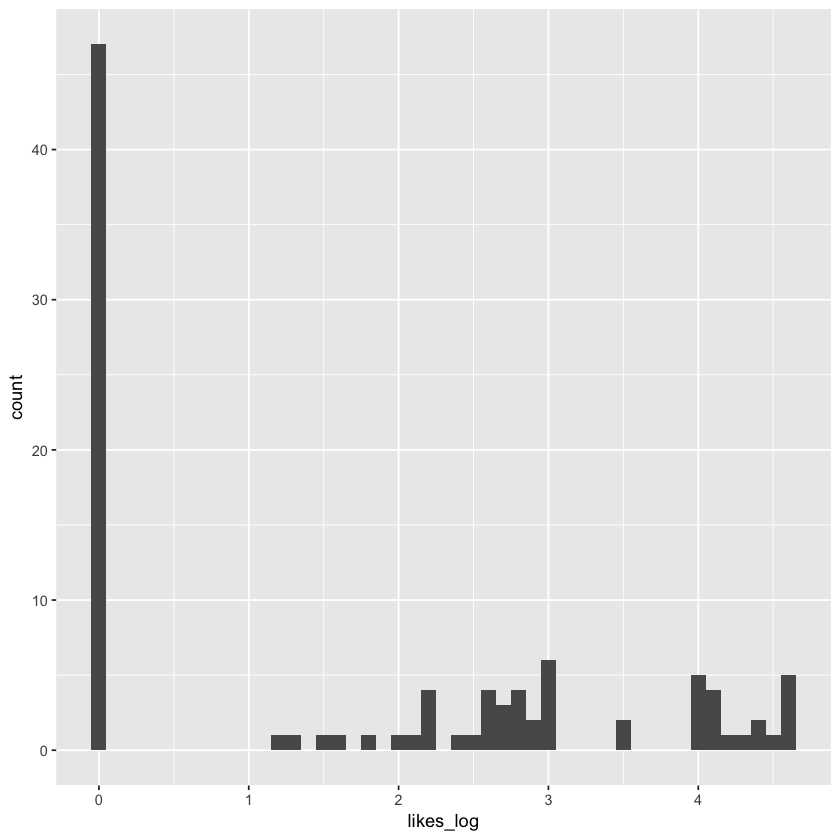

In [22]:
ggplot(rand_sample_log, aes(x = likes_log)) +
    geom_histogram(binwidth = .1)

What do I think is valuable to add at this point?
I wonder what number of genres looks like:

In [23]:
movies <- mutate(movies,
                num_genres = sapply(gregexpr("[|]", movies$genres), length))
movies

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,num_genres
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,3
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,⋯,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,2
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,⋯,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,2
Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,⋯,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,1
NA,Doug Walker,NA,NA,131,NA,Rob Walker,131,NA,Documentary,⋯,NA,NA,NA,NA,NA,12,7.1,NA,0,1
Color,Andrew Stanton,462,132,475,530,Samantha Morton,640,73058679,Action|Adventure|Sci-Fi,⋯,English,USA,PG-13,263700000,2012,632,6.6,2.35,24000,2
Color,Sam Raimi,392,156,0,4000,James Franco,24000,336530303,Action|Adventure|Romance,⋯,English,USA,PG-13,258000000,2007,11000,6.2,2.35,0,2
Color,Nathan Greno,324,100,15,284,Donna Murphy,799,200807262,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,⋯,English,USA,PG,260000000,2010,553,7.8,1.85,29000,6
Color,Joss Whedon,635,141,0,19000,Robert Downey Jr.,26000,458991599,Action|Adventure|Sci-Fi,⋯,English,USA,PG-13,250000000,2015,21000,7.5,2.35,118000,2
Color,David Yates,375,153,282,10000,Daniel Radcliffe,25000,301956980,Adventure|Family|Fantasy|Mystery,⋯,English,UK,PG,250000000,2009,11000,7.5,2.35,10000,3


Not sure what to do with this

Plot number of genres:

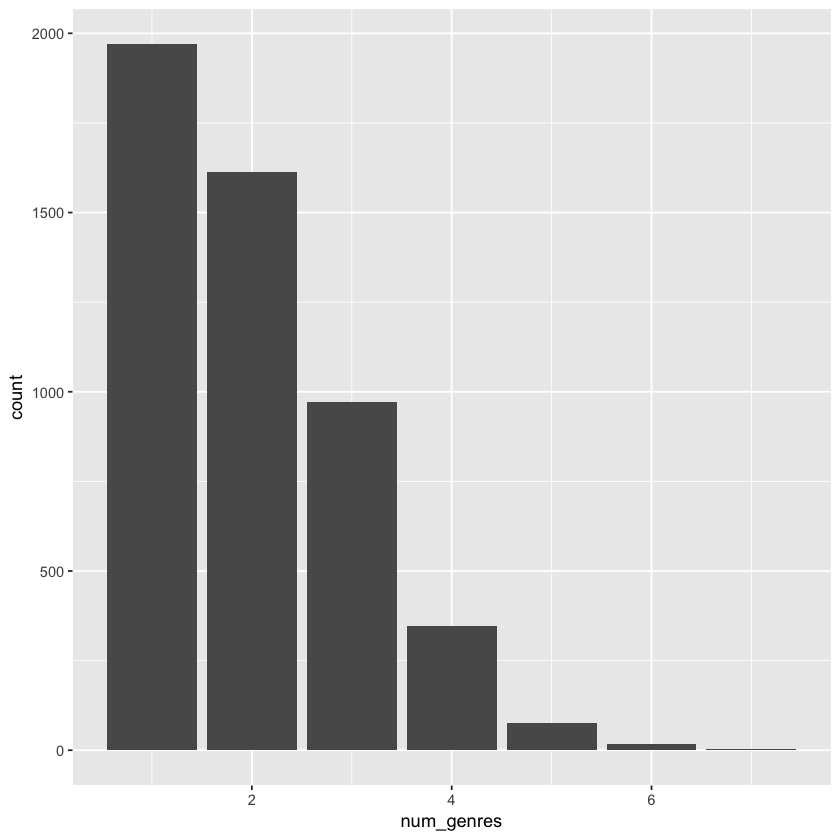

In [24]:
ggplot(movies) +
    geom_bar(aes(x = num_genres))

Now plot some other things - plot all the continuous variables to see if anything sticks out:

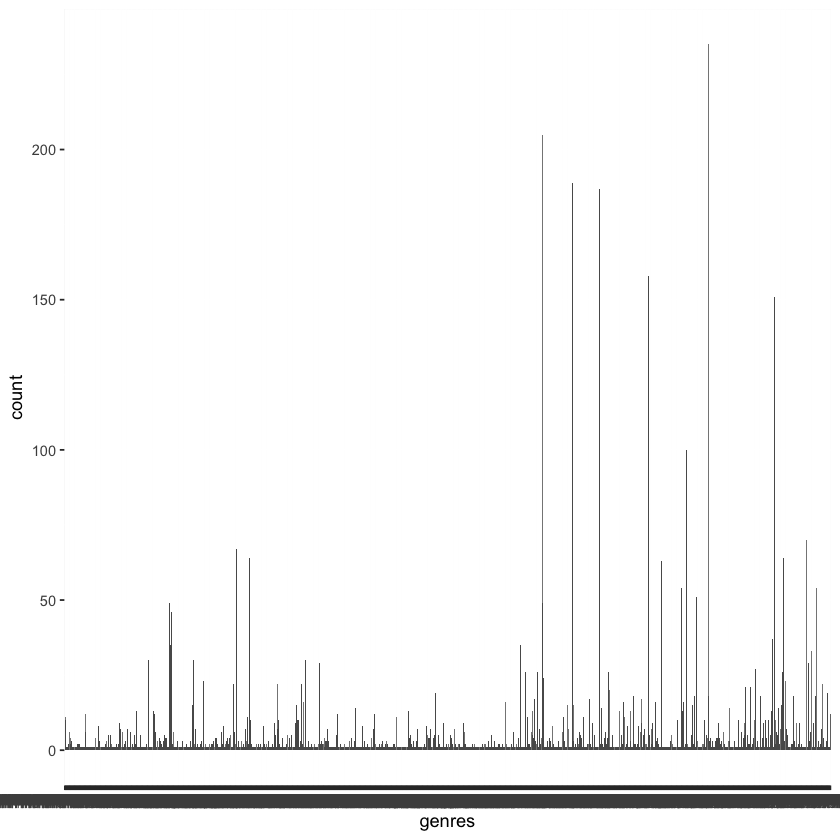

In [25]:
ggplot(movies) +
    geom_bar(aes(x = genres))

How many unique combinations of genres exist?

In [26]:
length(unique(movies$genres))
sort(unique(movies$genres))

[1] 914

[1] "Action"                                                          
  [2] "Action|Adventure"                                                
  [3] "Action|Adventure|Animation|Comedy|Crime|Family|Fantasy"          
  [4] "Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller" 
  [5] "Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi"           
  [6] "Action|Adventure|Animation|Comedy|Family"                        
  [7] "Action|Adventure|Animation|Comedy|Family|Fantasy"                
  [8] "Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi"         
  [9] "Action|Adventure|Animation|Comedy|Family|Sci-Fi"                 
 [10] "Action|Adventure|Animation|Comedy|Fantasy"                       
 [11] "Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi"                
 [12] "Action|Adventure|Animation|Comedy|Sci-Fi"                        
 [13] "Action|Adventure|Animation|Drama|Fantasy|Sci-Fi"                 
 [14] "Action|Adventure|Animation|Drama|Mystery|Sci-Fi|Thriller"        
 [15] "Action|Adventure|Animation|Family"                               
 [16] "Action|Adventure|Animation|Family|Fantasy"                       
 [17] "Action|Adventure|Animation|Family|Fantasy|Sci-Fi"                
 [18] "Action|Adventure|Animation|Family|Sci-Fi"                        
 [19] "Action|Adventure|Animation|Family|Sci-Fi|Thriller"               
 [20] "Action|Adventure|Animation|Fantasy"                              
 [21] "Action|Adventure|Animation|Fantasy|Romance|Sci-Fi"               
 [22] "Action|Adventure|Biography|Drama|History"                        
 [23] "Action|Adventure|Biography|Drama|History|Romance|War"            
 [24] "Action|Adventure|Biography|Drama|History|Thriller"               
 [25] "Action|Adventure|Comedy"                                         
 [26] "Action|Adventure|Comedy|Crime"                                   
 [27] "Action|Adventure|Comedy|Crime|Family|Romance|Thriller"           
 [28] "Action|Adventure|Comedy|Crime|Music|Mystery"                     
 [29] "Action|Adventure|Comedy|Crime|Mystery|Thriller"                  
 [30] "Action|Adventure|Comedy|Crime|Thriller"                          
 [31] "Action|Adventure|Comedy|Drama|Music|Sci-Fi"                      
 [32] "Action|Adventure|Comedy|Drama|Thriller"                          
 [33] "Action|Adventure|Comedy|Drama|War"                               
 [34] "Action|Adventure|Comedy|Family"                                  
 [35] "Action|Adventure|Comedy|Family|Fantasy"                          
 [36] "Action|Adventure|Comedy|Family|Fantasy|Mystery|Sci-Fi"           
 [37] "Action|Adventure|Comedy|Family|Fantasy|Sci-Fi"                   
 [38] "Action|Adventure|Comedy|Family|Mystery"                          
 [39] "Action|Adventure|Comedy|Family|Romance"                          
 [40] "Action|Adventure|Comedy|Family|Romance|Sci-Fi"                   
 [41] "Action|Adventure|Comedy|Family|Sci-Fi"                           
 [42] "Action|Adventure|Comedy|Fantasy"                                 
 [43] "Action|Adventure|Comedy|Fantasy|Mystery"                         
 [44] "Action|Adventure|Comedy|Fantasy|Romance"                         
 [45] "Action|Adventure|Comedy|Fantasy|Sci-Fi"                          
 [46] "Action|Adventure|Comedy|Fantasy|Thriller"                        
 [47] "Action|Adventure|Comedy|Music|Thriller"                          
 [48] "Action|Adventure|Comedy|Musical"                                 
 [49] "Action|Adventure|Comedy|Romance"                                 
 [50] "Action|Adventure|Comedy|Romance|Sci-Fi"                          
 [51] "Action|Adventure|Comedy|Romance|Thriller"                        
 [52] "Action|Adventure|Comedy|Romance|Thriller|Western"                
 [53] "Action|Adventure|Comedy|Sci-Fi"                                  
 [54] "Action|Adventure|Comedy|Sci-Fi|Thriller"                         
 [55] "Action|Adventure|Comedy|Thriller"                    

Two continuous variables in a scatter plot with one categorical variable as color:

Warning message:
“Removed 491 rows containing missing values (geom_point).”

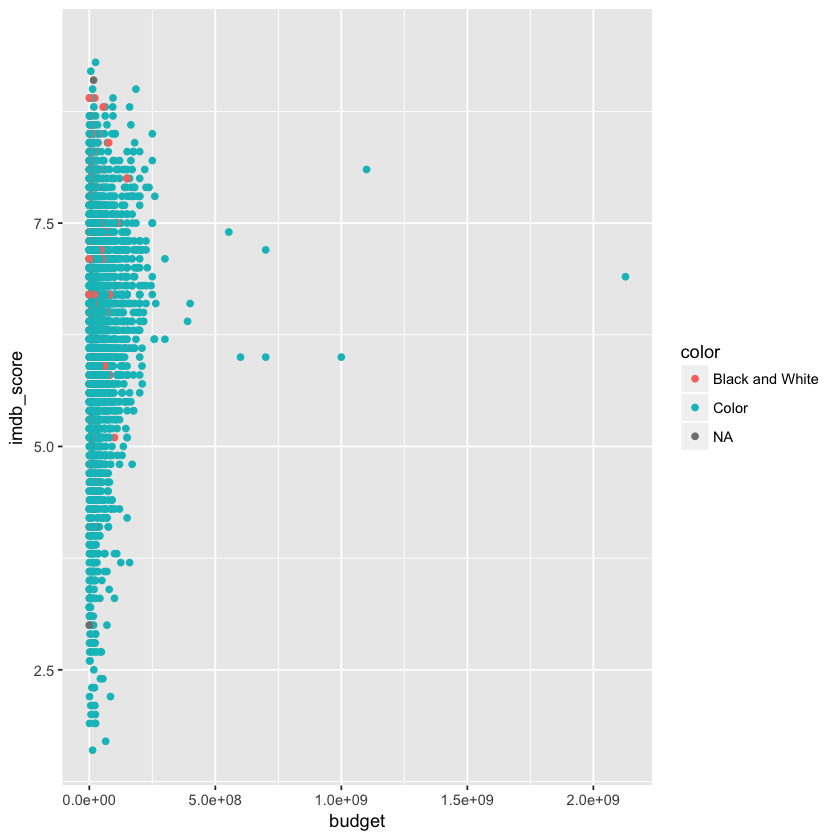

In [27]:
ggplot(movies) +
    geom_point(aes(x = budget, y = imdb_score, color = color))

Single categorical variable in bar chart:

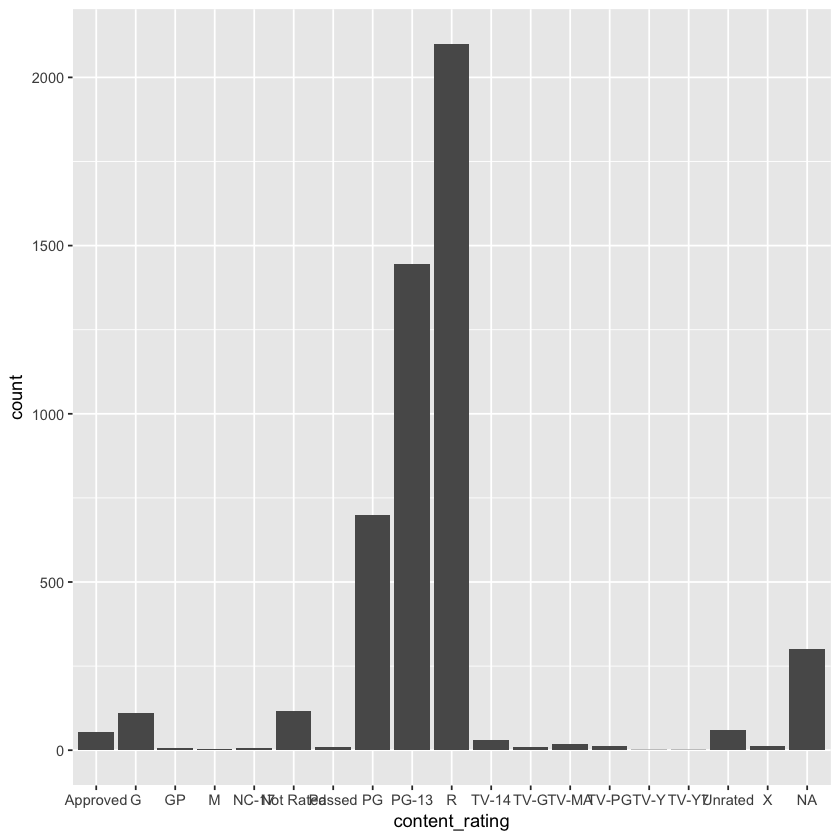

In [28]:
ggplot(movies, aes(x = content_rating)) +
    geom_bar()

Single continuous variable in histogram:

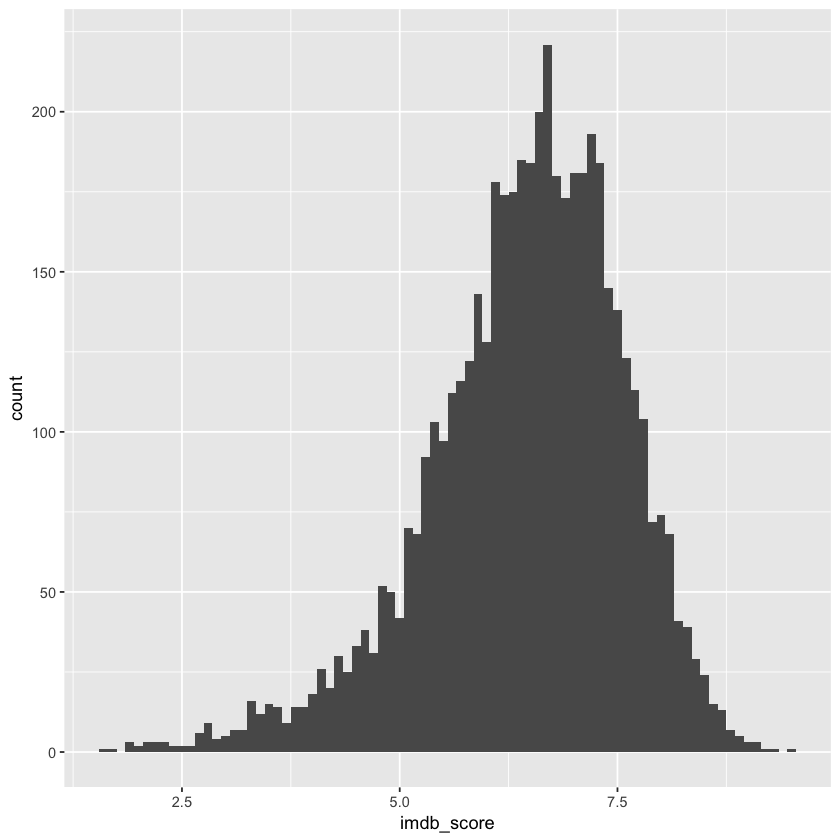

In [29]:
ggplot(movies, aes(x = imdb_score)) +
    geom_histogram(binwidth = .1)

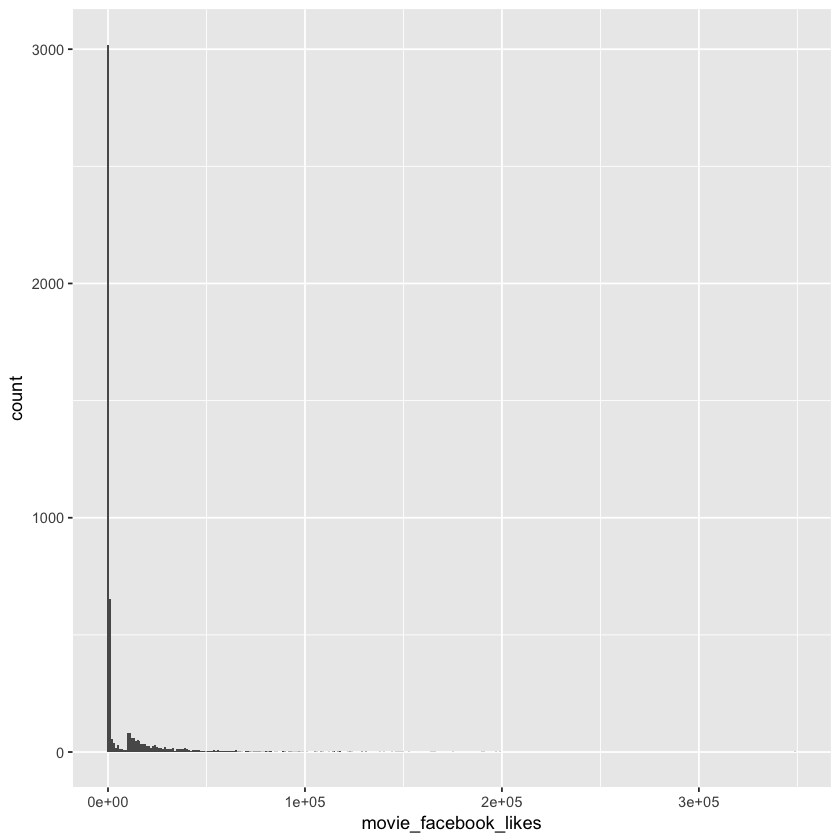

In [30]:
ggplot(movies, aes(x = movie_facebook_likes)) +
    geom_histogram(binwidth = 1000)

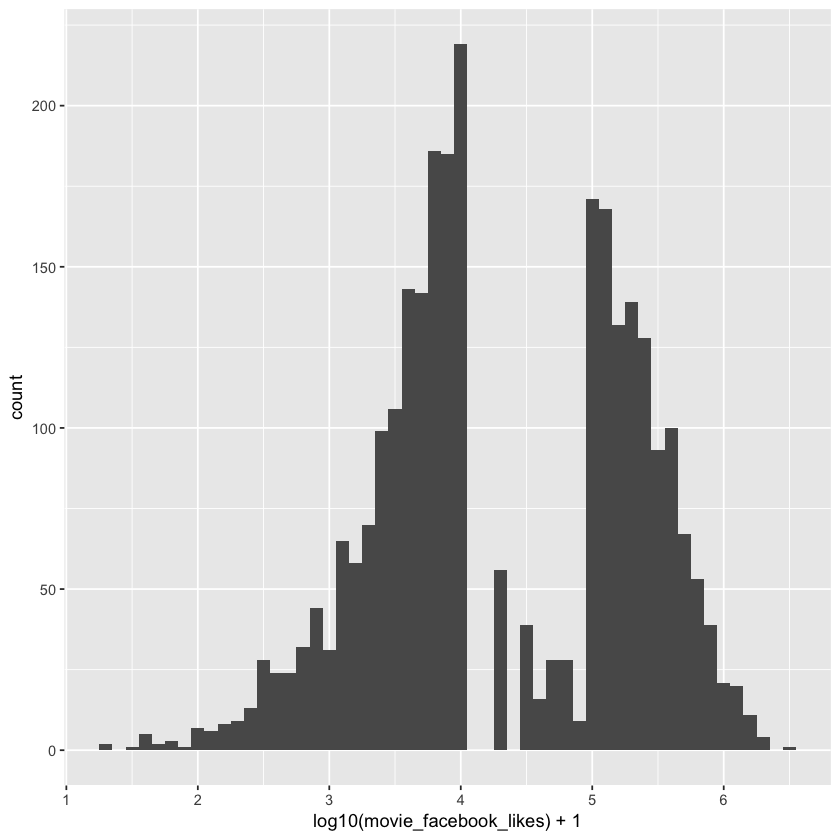

In [31]:
movies %>%
    filter(movie_facebook_likes > 0) %>%
    ggplot(aes(x = log10(movie_facebook_likes) + 1)) +
        geom_histogram(binwidth = .1)

In [32]:
x <- movies$movie_facebook_likes
sort(x)

[1]      0      0      0      0      0      0      0      0      0      0
  [11]      0      0      0      0      0      0      0      0      0      0
  [21]      0      0      0      0      0      0      0      0      0      0
  [31]      0      0      0      0      0      0      0      0      0      0
  [41]      0      0      0      0      0      0      0      0      0      0
  [51]      0      0      0      0      0      0      0      0      0      0
  [61]      0      0      0      0      0      0      0      0      0      0
  [71]      0      0      0      0      0      0      0      0      0      0
  [81]      0      0      0      0      0      0      0      0      0      0
  [91]      0      0      0      0      0      0      0      0      0      0
 [101]      0      0      0      0      0      0      0      0      0      0
 [111]      0      0      0      0      0      0      0      0      0      0
 [121]      0      0      0      0      0      0      0      0      0      0
 [131]      0      0      0      0      0      0      0      0      0      0
 [141]      0      0      0      0      0      0      0      0      0      0
 [151]      0      0      0      0      0      0      0      0      0      0
 [161]      0      0      0      0      0      0      0      0      0      0
 [171]      0      0      0      0      0      0      0      0      0      0
 [181]      0      0      0      0      0      0      0      0      0      0
 [191]      0      0      0      0      0      0      0      0      0      0
 [201]      0      0      0      0      0      0      0      0      0      0
 [211]      0      0      0      0      0      0      0      0      0      0
 [221]      0      0      0      0      0      0      0      0      0      0
 [231]      0      0      0      0      0      0      0      0      0      0
 [241]      0      0      0      0      0      0      0      0      0      0
 [251]      0      0      0      0      0      0      0      0      0      0
 [261]      0      0      0      0      0      0      0      0      0      0
 [271]      0      0      0      0      0      0      0      0      0      0
 [281]      0      0      0      0      0      0      0      0      0      0
 [291]      0      0      0      0      0      0      0      0      0      0
 [301]      0      0      0      0      0      0      0      0      0      0
 [311]      0      0      0      0      0      0      0      0      0      0
 [321]      0      0      0      0      0      0      0      0      0      0
 [331]      0      0      0      0      0      0      0      0      0      0
 [341]      0      0      0      0      0      0      0      0      0      0
 [351]      0      0      0      0      0      0      0      0      0      0
 [361]      0      0      0      0      0      0      0      0      0      0
 [371]      0      0      0      0      0      0      0      0      0      0
 [381]      0      0      0      0      0      0      0      0      0      0
 [391]      0      0      0      0      0      0      0      0      0      0
 [401]      0      0      0      0      0      0      0      0      0      0
 [411]      0      0      0      0      0      0      0      0      0      0
 [421]      0      0      0      0      0      0      0      0      0      0
 [431]      0      0      0      0      0      0      0      0      0      0
 [441]      0      0      0      0      0      0      0      0      0      0
 [451]      0      0      0      0      0      0      0      0      0      0
 [461]      0      0      0      0      0      0      0      0      0      0
 [471]      0      0      0      0      0      0      0      0      0      0
 [481]      0      0      0      0      0      0      0      0      0      0
 [491]      0      0      0      0      0      0      0      0      0      0
 [501]      0      0      0      0      0      0      0      0      0      0
 [511]      0      0      0      0      0      0      0      0      0      0

In [33]:
y <- log10(movies$movie_facebook_likes + 1)
sort(y)

[1] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
   [8] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [15] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [22] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [29] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [36] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [43] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [50] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [57] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [64] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [71] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [78] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [85] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [92] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [99] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [106] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [113] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [120] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [127] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [134] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [141] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [148] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [155] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [162] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [169] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [176] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [183] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [190] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [197] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [204] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [211] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [218] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [225] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [232] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [239] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [246] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [253] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [260] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [267] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [274] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [281] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [288] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [295] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [302] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [309] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [316] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [323] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [330] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [337] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [344] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [351] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [358] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000

In [34]:
d <- data.frame(
  x   = runif(90),
  grp = gl(3, 30)
) 
d

x,grp
0.26005795,1
0.39016909,1
0.55159013,1
0.04932114,1
0.55976375,1
0.98640811,1
0.47977555,1
0.95512357,1
0.35797628,1
0.72336817,1


In [35]:
# top values from x per group in grp
d %>%
    group_by(grp) %>%
    top_n(n = 2, wt = x)

x,grp
0.9864081,1
0.9914209,1
0.9327301,2
0.9995887,2
0.9111231,3
0.9474267,3


In [ ]:
imdb_user_reviews <- movies %>%
    select(num_user_for_reviews) %>%
    filter(num_user_for_reviews > 0) %>%
    mutate(log_num_user_for_reviews = log10(num_user_for_reviews))
imdb_user_reviews

In [ ]:
ggplot(imdb_user_reviews, aes(x = num_user_for_reviews)) +
    geom_histogram(binwidth = 50, na.rm = TRUE)

In [ ]:
ggplot(imdb_user_reviews, aes(x = num_user_for_reviews)) +
    geom_histogram(binwidth = .1, na.rm = TRUE) +
    scale_x_log10(limits = c(1, 6000)) +
    annotation_logticks()

In [ ]:
ggplot(imdb_user_reviews, aes(x = log10(num_user_for_reviews))) +
    geom_histogram(binwidth = .1, na.rm = TRUE) +
    annotation_logticks()